In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_table('smsspamcollection.tsv')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

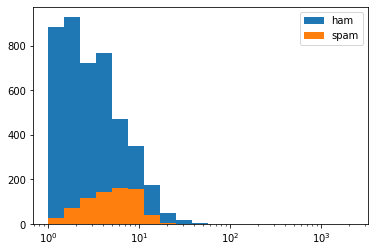

In [ ]:
plt.xscale('log')
bins=1.5**np.arange(0,20)
plt.hist(df[df['label']=='ham']['punct'],bins=bins)
plt.hist(df[df['label']=='spam']['punct'],bins=bins)
plt.legend(['ham','spam'])
plt.show()

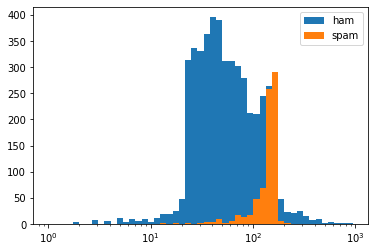

In [ ]:
plt.xscale('log')
bins=1.15**np.arange(0,50)
plt.hist(df[df['label']=='ham']['length'],bins=bins)
plt.hist(df[df['label']=='spam']['length'],bins=bins)
plt.legend(['ham','spam'])
plt.show()

In [ ]:
X= df.iloc[:,2:]
y= df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
#Step-1 : Import the model
from sklearn.linear_model import LogisticRegression

#Step-2 : Create an object
lr= LogisticRegression()

#Step-3 : Train the model - m & c -> sigmoid => binary outcome - 0 or 1
lr.fit(Xtrain,ytrain)

#Step-4 : Make prediction
ypred= lr.predict(Xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ham       0.86      0.97      0.91      1442
        spam       0.08      0.02      0.03       230

    accuracy                           0.84      1672
   macro avg       0.47      0.49      0.47      1672
weighted avg       0.75      0.84      0.79      1672



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
#Missing values in text data
blanks =[]

for i, lb, msg, lg, pn in df.itertuples():
  if(type(msg)==str):
    if(msg.isspace()):
      blanks.append(i)

blanks

#df.drop(blanks, inplace=True)

[]

In [ ]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [ ]:
from wordcloud import WordCloud

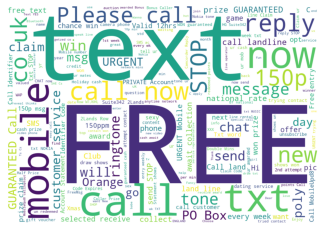

In [ ]:
wc= WordCloud(width=1000, height=700, background_color='white', min_font_size=10)

wc.generate(" ".join(df[df['label']=='spam']['message']))
plt.imshow(wc)
plt.axis('off')
plt.show()

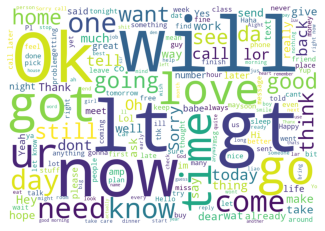

In [ ]:
wc.generate(" ".join(df[df['label']=='ham']['message']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def cleantext(text):
  token= word_tokenize(text.lower())
  ftoken= [t for t in token if(t.isalpha())]
  stop= stopwords.words('english')

  ctoken= [t for t in ftoken if(t not in stop)]

  lemma= WordNetLemmatizer()
  ltoken= [lemma.lemmatize(t) for t in ctoken]

  return ' '.join(ltoken)

In [ ]:
df['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [ ]:
df['message']= df['message'].apply(cleantext)

In [ ]:
df.head()

,label,message,length,punct
0,ham,go jurong point available bugis n great world ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry wkly comp win fa cup final tkts may...,155,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah think go usf life around though,61,2


In [ ]:
X= df['message']
y= df['label']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X= cv.fit_transform(X).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

In [ ]:
def mymodel(model):
  model.fit(Xtrain, ytrain)
  ypred= model.predict(Xtest)
  print(classification_report(ytest, ypred))
  return model

In [ ]:
lr= mymodel(LogisticRegression())

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1442
        spam       0.97      0.84      0.90       230

    accuracy                           0.97      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
svm= mymodel(LinearSVC())

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1442
        spam       0.97      0.86      0.91       230

    accuracy                           0.98      1672
   macro avg       0.97      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
nb= mymodel(GaussianNB())

              precision    recall  f1-score   support

         ham       0.98      0.88      0.93      1442
        spam       0.55      0.89      0.68       230

    accuracy                           0.88      1672
   macro avg       0.76      0.89      0.80      1672
weighted avg       0.92      0.88      0.89      1672



In [ ]:
msg1= 'Free...! Free...! Free...! Buy 1 Get 1 Free, offer valid till november hurry up...!'
msg2= 'call me tomorrow, as i wanted to discuss something important...'

In [ ]:
text= cleantext(msg1)
newx= cv.transform([text]).toarray()
pred= lr.predict(newx)[0]
pred

'spam'

In [ ]:
def checksentiment(text):
  text= cleantext(text)
  newx= cv.transform([text]).toarray()
  pred= lr.predict(newx)[0]
  return pred

In [ ]:
checksentiment(msg1)

'spam'

In [ ]:
checksentiment(msg2)

'ham'

In [ ]:
df.head()

,label,message,length,punct
0,ham,go jurong point available bugis n great world ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry wkly comp win fa cup final tkts may...,155,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah think go usf life around though,61,2


In [ ]:
smsg= df['message'][2]
hmsg= df['message'][1]

In [ ]:
checksentiment(smsg)

'spam'

In [ ]:
checksentiment(hmsg)

'ham'